# 🐍 NYC High School Directory Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

## ✅ Instructions:

### 1. Download the dataset from the `day_2_datasets` folder.

In [3]:
# download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("new-york-city/nyc-high-school-directory")

print("Path to dataset files:", path)

/Users/zeal.v/Desktop/Mock_Interviews/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/zeal.v/.cache/kagglehub/datasets/new-york-city/nyc-high-school-directory/versions/7


In [4]:
import os

# List all files in the dataset directory to find the correct CSV file
print("Files in dataset directory:")
print(os.listdir(path))

Files in dataset directory:
['doe-high-school-directory-2013-2014.csv', 'DOE_High_Shool_Directory_2013-2014.xlsx', 'Archived_DOE_High_School_Directory_2014-2015.csv', '2016-doe-high-school-directory.csv', 'socrata_metadata_2016-doe-high-school-directory.json', 'socrata_metadata_doe-high-school-directory-2013-2014.json', 'socrata_metadata_2014-2015-doe-high-school-directory.json', 'doe hsdirectory school column description.csv', '2017-doe-high-school-directory.csv', 'socrata_metadata_2017-doe-high-school-directory.json', '2016_DOE_High_School_Directory.xlsx', '2014-2015_DOE_High_Shool_Directory.xlsx', 'Archived_DOE_High_School_Directory_2016.csv', '2014-2015-doe-high-school-directory.csv', '2017_DOE_High_School_Directory.xlsx']


### 2. Open a new Jupyter Notebook and:

#### - Load the dataset using pandas

In [5]:
# Load the dataset
df = pd.read_csv(os.path.join(path, "2014-2015-doe-high-school-directory.csv"))

# Display the first few rows of the DataFrame
print(f"First few rows of the DataFrame:\n{df.head()}")

First few rows of the DataFrame:
      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  

In [42]:
# Display the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (435, 69)


#### - Clean the column names (make lowercase, replace spaces with _, remove special characters)

In [16]:
# Display the columns of the DataFrame
print(f"Columns in the DataFrame:\n{df.columns.tolist()}")

Columns in the DataFrame:
['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priori

In [18]:
# Clean the column names (make lowercase, replace spaces with _, remove special characters)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)
# Display the cleaned column names
print(f"Cleaned column names:\n{df.columns.tolist()}")

Cleaned column names:
['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priority10

In [19]:
# Display the data types of the columns
print(f"Data types of the columns:\n{df.dtypes}")

Data types of the columns:
dbn                        object
school_name                object
borough                    object
building_code              object
phone_number               object
                           ...   
zip_codes                 float64
community_districts         int64
borough_boundaries          int64
city_council_districts      int64
police_precincts            int64
Length: 69, dtype: object


In [20]:
# Display summary statistics of the DataFrame
print(f"Summary statistics of the DataFrame:\n{df.describe()}")   

Summary statistics of the DataFrame:
       grade_span_min  grade_span_max  expgrade_span_min  expgrade_span_max  \
count      432.000000      435.000000          31.000000          33.000000   
mean         8.442130       11.894253           8.516129          12.363636   
std          1.164591        0.421583           1.121635           0.783349   
min          6.000000        9.000000           6.000000          12.000000   
25%          9.000000       12.000000           9.000000          12.000000   
50%          9.000000       12.000000           9.000000          12.000000   
75%          9.000000       12.000000           9.000000          12.000000   
max          9.000000       12.000000           9.000000          14.000000   

           postcode  total_students  number_programs  community_board  \
count    435.000000      426.000000       435.000000       432.000000   
mean   10726.096552      703.842723         1.708046         6.787037   
std      537.927907      775.870

### 3. Filter the dataset to include only schools located in Brooklyn

In [39]:
# Filter the dataset to include only schools located in Brooklyn
brooklyn_schools = df[df['borough'] == 'Brooklyn']
brooklyn_schools.head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52


### 4. Answer the following:

#### - How many total schools are in Brooklyn?

In [40]:
# How many total schools are in Brooklyn?
total_brooklyn_schools = len(brooklyn_schools)
print(f"Total schools in Brooklyn: {total_brooklyn_schools}")

Total schools in Brooklyn: 121


#### - How many Brooklyn schools offer Grade 9 entry?

In [46]:
# How many Brooklyn schools offer Grade 9 entry?
grade_9_entry_schools = brooklyn_schools[brooklyn_schools['grade_span_min'] <= 9]
total_grade_9_entry_schools = len(grade_9_entry_schools)
print(f"Total schools in Brooklyn offering Grade 9 entry: {total_grade_9_entry_schools}")

Total schools in Brooklyn offering Grade 9 entry: 121


### 5. Group and summarize:



#### - Count of schools per borough

In [53]:
# Count of schools per borough
borough_counts = df['borough'].value_counts()
print(f"Count of schools per borough:\n{borough_counts}")

Count of schools per borough:
borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64


In [59]:
df['borough'].isnull().sum() 

0

### 6. Create visualizations:

#### - Bar chart: Number of schools per borough

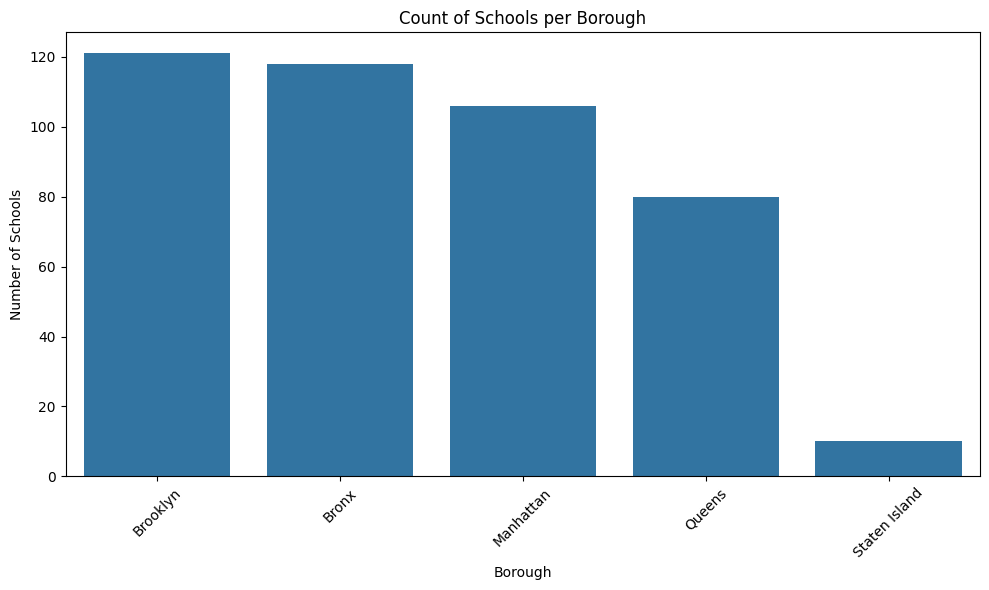

In [49]:
# Plot the count of schools per borough
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='borough', order=borough_counts.index)
plt.title('Count of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()